#**SKLearn dengan Teknik Grid Search**

 Latihan kali ini kita akan menggunakan grid search untuk mencari parameter terbaik pada sebuah model SVR. Dataset yang kita gunakan sama seperti di modul 3 yaitu dataset gaji.

 Pada latihan tersebut model belum mampu menyesuaikan pola pada data dengan baik. Tujuan kita adalah menggunakan grid search untuk mencari parameter yang lebih baik bagi model.

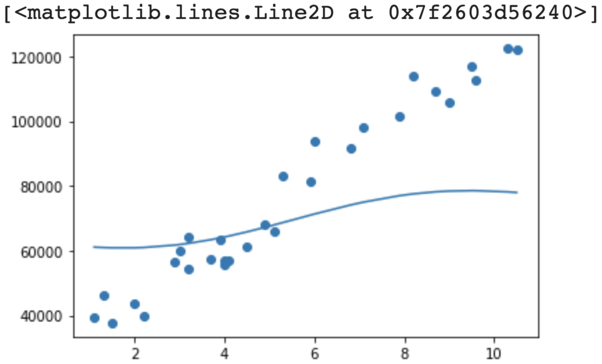

Tahapan latihan kali ini sebagai berikut:

* Ubah dataset data menjadi Dataframe.
* Definisikan parameter yang akan diuji.
* Jalankan fungsi grid search.
* Latih model dengan parameter terbaik hasil grid search.
* Buat plot dari model.


In [1]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [2]:
data.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


Kemudian pisahkan atribut dan label pada dataset. Masih ingat bukan, bahwa jika hanya terdapat 1 atribut pada dataset kita perlu mengubah bentuknya agar bisa dipakai pada pelatihan model.

In [3]:
import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = np.array(X)
X = X.reshape(-1,1)

In [4]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


Selanjutnya, untuk menggunakan grid search, kita impor library GridSearchCV dari sklearn.model_selection. Lalu kita buat model yang ingin kita uji dengan grid search dalam hal ini model SVR.

Kemudian kita buat sebuah python dictionary yang berisi nama parameter yang akan diuji, serta nilai-nilainya. Selanjutnya kita buat objek grid search dan mengisi parameter-parameternya.

Parameter pertama adalah model yang akan kita uji. Parameter kedua adalah dictionary yang berisi kumpulan parameter dari model yang akan diuji. Terakhir kita panggil fungsi fit() pada objek grid search yang telah kita buat.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

Setelah grid search mencari parameter terbaik pada model, kita bisa menampilkan parameter terbaik dengan memanggil atribut best_params_ dari objek grid search.

In [6]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


Selanjutnya Anda bisa mencoba membuat model SVM baru dengan parameter hasil grid search dan melatihnya pada data.

In [7]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

Terakhir kita bisa memvisualisasikan SVR dengan parameter hasil grid search. Dapat dilihat dari hasil plot bahwa grid search berhasil mencari parameter yang lebih baik sehingga meningkatkan performa dari model.

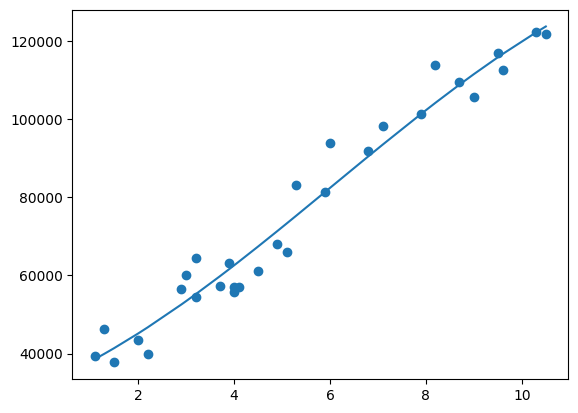

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

Selamat! Anda telah memahami dan bisa menggunakan grid search untuk mencari parameter terbaik dari suatu model. Dengan grid search Anda akan menghemat banyak waktu dalam mencari parameter terbaik dari model machine learning yang anda kembangkan ke depannya.